In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [4]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [5]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
cvect

CountVectorizer()

In [13]:
# fit_transorm은 train에만
dtm = cvect.fit_transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [15]:
cvect.get_feature_names_out()

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [16]:

cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [17]:

df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
df_dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [18]:
df_dtm.sum()

거리두기     1
거리두기와    1
문의입니다    6
버스       2
상생지원금    1
선별진료소    1
승강장      2
안내입니다    2
요금       1
운행시간     1
운행시간과    1
위치       1
지하철      3
코로나      4
택시       1
터미널      1
dtype: int64

In [33]:
pd.options.display.max_columns = None

In [19]:
cvect = CountVectorizer(ngram_range=(1, 2))
dtm = cvect.fit_transform(corpus)
dtm

<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [34]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
df_dtm.sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,3,1,1,1,4,1,1,1,1,1,1,1,1


In [35]:
(df_dtm != 0).sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1


In [133]:
def display_transform_dtm(cvect, corpus):
    """
    모델을 받아 변환을 하고 문서 용어 행렬을 반환하는 함수
    """
    dtm = cvect.fit_transform(corpus)
    df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
    
    print(f'단어수 : {len(cvect.get_feature_names_out())}')
    print(f'{cvect.get_feature_names_out()}')
    display(df_dtm.style.background_gradient())
    return dtm

In [40]:
display_transform_dtm(cvect, corpus)

단어수 : 36
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [63]:

display_transform_dtm(CountVectorizer(min_df=0.2, ), corpus)

단어수 : 6
['문의입니다' '버스' '승강장' '안내입니다' '지하철' '코로나']


,문의입니다,버스,승강장,안내입니다,지하철,코로나
0,1,0,0,0,0,2
1,1,0,0,0,2,0
2,1,0,1,0,1,0
3,1,0,0,0,0,1
4,1,1,0,0,0,0
5,0,1,0,1,0,0
6,0,0,0,1,0,1
7,1,0,1,0,0,0


<8x6 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [62]:

display_transform_dtm(CountVectorizer(max_df=0.7), corpus)

단어수 : 15
['거리두기' '거리두기와' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간' '운행시간과'
 '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


<8x15 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [65]:
stop_words=["코로나", "문의입니다", "와"]
# max_features 갯수만큼의 단어만 추출하기

cvect = CountVectorizer(min_df=.01, max_df=.9, max_features=50, stop_words=stop_words)
display_transform_dtm(cvect, corpus)

단어수 : 14
['거리두기' '거리두기와' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간' '운행시간과'
 '위치' '지하철' '택시' '터미널']


,거리두기,거리두기와,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,택시,터미널
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,0,2,0,0
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,1,0,0,0,1,0,0,1
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,1,0


<8x14 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [68]:

cvect = CountVectorizer(analyzer='char_wb',
                        ngram_range=(1,7),
                        min_df=.01, 
                        max_df=.9, 
                        max_features=50, 
                        stop_words=stop_words)
display_transform_dtm(cvect, corpus)

단어수 : 50
[' 문' ' 문의' ' 문의입' ' 문의입니' ' 문의입니다' ' 문의입니다.' ' 지' ' 지하' ' 지하철' ' 지하철 '
 ' 코' ' 코로' ' 코로나' ' 코로나 ' '나' '나 ' '내입니다.' '내입니다. ' '두' '로' '로나' '로나 '
 '리두' '문' '문의' '문의입' '문의입니' '문의입니다' '문의입니다.' '문의입니다. ' '시' '의' '의입' '의입니'
 '의입니다' '의입니다.' '의입니다. ' '지' '지하' '지하철' '지하철 ' '철' '철 ' '코' '코로' '코로나'
 '코로나 ' '하' '하철' '하철 ']


,문,문의,문의입,문의입니,문의입니다,문의입니다.,지,지하,지하철,지하철,코,코로,코로나,코로나,나,나,내입니다.,내입니다.,두,로,로나,로나,리두,문,문의,문의입,문의입니,문의입니다,문의입니다.,문의입니다.,시,의,의입,의입니,의입니다,의입니다.,의입니다.,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철
0,1,1,1,1,1,1,0,0,0,0,2,2,2,2,2,2,0,0,1,2,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,0,0,0
1,1,1,1,1,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1
3,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<8x50 sparse matrix of type '<class 'numpy.int64'>'
	with 191 stored elements in Compressed Sparse Row format>

In [71]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()

pipe['tfid'].idf_

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
df_dtm = pd.DataFrame(display_transform_dtm(tfidfvect, corpus).toarray(), columns=cvect.get_feature_names_out())

단어수 : 16
['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [84]:

idf = tfidfvect.idf_
idf

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [106]:
# TFIDF
df_dtm.replace(0,np.nan).max(axis=0).sort_values(ascending=False)

선별진료소    0.751070
지하철      0.745200
운행시간     0.715732
택시       0.715732
코로나      0.694148
거리두기     0.670344
승강장      0.651563
버스       0.599839
안내입니다    0.561801
위치       0.541948
터미널      0.541948
거리두기와    0.479919
상생지원금    0.479919
요금       0.444589
운행시간과    0.444589
문의입니다    0.388500
dtype: float64

In [107]:
df_dtm.replace(0,np.nan).min(axis=0).sort_values(ascending=True)

문의입니다    0.222166
요금       0.444589
운행시간과    0.444589
버스       0.454195
안내입니다    0.454195
거리두기와    0.479919
상생지원금    0.479919
코로나      0.484788
위치       0.541948
터미널      0.541948
승강장      0.599839
지하철      0.651563
거리두기     0.670344
운행시간     0.715732
택시       0.715732
선별진료소    0.751070
dtype: float64

In [109]:

idf_dict = dict(zip(tfidfvect.get_feature_names(), idf))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

<AxesSubplot:>

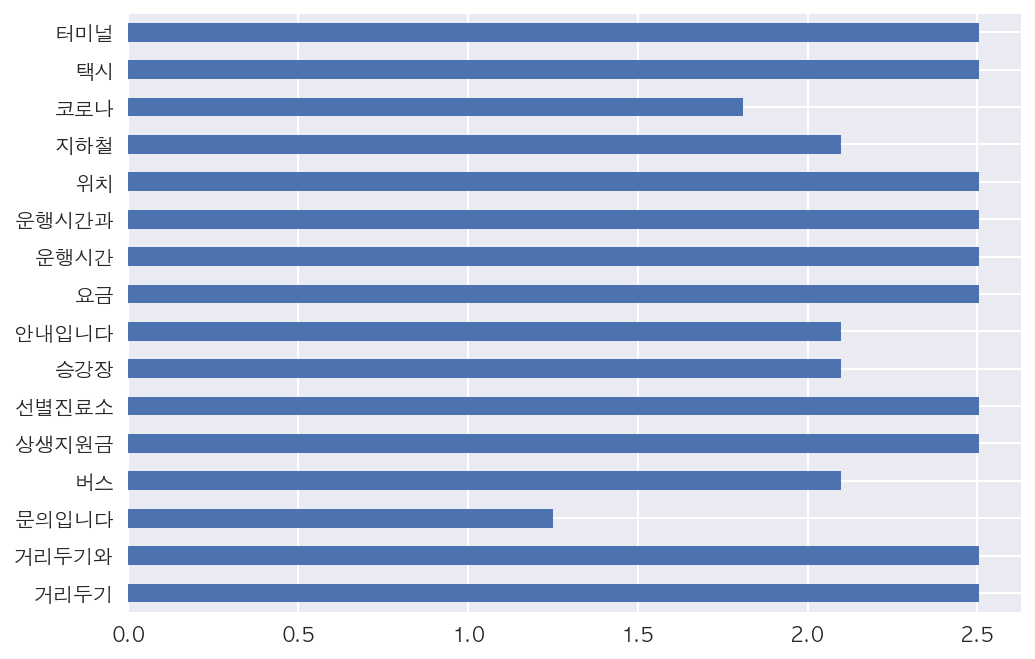

In [129]:
pd.Series(idf_dict).plot(kind='barh')

In [130]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = ["문의입니다", '안내입니다', '와', '과']
tfidfvect = TfidfVectorizer(analyzer='char_wb',
                            ngram_range=(1,7), 
                            max_df=.8, 
                            min_df=.2, 
                            max_features=50, 
                            stop_words=stop_words)
display_transform_dtm(tfidfvect, corpus)

단어수 : 50
[' 문' ' 문의' ' 문의입' ' 문의입니' ' 문의입니다' ' 문의입니다.' ' 지' ' 지하' ' 지하철' ' 지하철 '
 ' 코' ' 코로' ' 코로나' ' 코로나 ' '나' '나 ' '로' '로나' '로나 ' '문' '문의' '문의입' '문의입니'
 '문의입니다' '문의입니다.' '문의입니다. ' '버스' '시' '안내입니다' '운행시간' '의' '의입' '의입니' '의입니다'
 '의입니다.' '의입니다. ' '지' '지하' '지하철' '지하철 ' '철' '철 ' '코' '코로' '코로나' '코로나 ' '하'
 '하철' '하철 ' '행']


,문,문의,문의입,문의입니,문의입니다,문의입니다.,지,지하,지하철,지하철,코,코로,코로나,코로나,나,나,로,로나,로나,문,문의,문의입,문의입니,문의입니다,문의입니다.,문의입니다.,버스,시,안내입니다,운행시간,의,의입,의입니,의입니다,의입니다.,의입니다.,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철,행
0,0.087704,0.087704,0.087704,0.087704,0.087704,0.087704,0.000000,0.000000,0.000000,0.000000,0.253854,0.253854,0.253854,0.253854,0.253854,0.253854,0.253854,0.253854,0.253854,0.087704,0.087704,0.087704,0.087704,0.087704,0.087704,0.087704,0.000000,0.000000,0.000000,0.000000,0.087704,0.087704,0.087704,0.087704,0.087704,0.087704,0.126927,0.000000,0.000000,0.000000,0.000000,0.000000,0.253854,0.253854,0.253854,0.253854,0.000000,0.000000,0.000000,0.000000
1,0.076672,0.076672,0.076672,0.076672,0.076672,0.076672,0.257176,0.257176,0.257176,0.257176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076672,0.076672,0.076672,0.076672,0.076672,0.076672,0.076672,0.000000,0.110961,0.000000,0.128588,0.076672,0.076672,0.076672,0.076672,0.076672,0.076672,0.221922,0.257176,0.257176,0.257176,0.257176,0.257176,0.000000,0.000000,0.000000,0.000000,0.257176,0.257176,0.257176,0.128588
2,0.135027,0.135027,0.135027,0.135027,0.135027,0.135027,0.226458,0.226458,0.226458,0.226458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135027,0.135027,0.135027,0.135027,0.135027,0.135027,0.135027,0.000000,0.000000,0.000000,0.000000,0.135027,0.135027,0.135027,0.135027,0.135027,0.135027,0.195415,0.226458,0.226458,0.226458,0.226458,0.226458,0.000000,0.000000,0.000000,0.000000,0.226458,0.226458,0.226458,0.000000
3,0.147078,0.147078,0.147078,0.147078,0.147078,0.147078,0.000000,0.000000,0.000000,0.000000,0.212855,0.212855,0.212855,0.212855,0.212855,0.212855,0.212855,0.212855,0.212855,0.147078,0.147078,0.147078,0.147078,0.147078,0.147078,0.147078,0.000000,0.000000,0.000000,0.000000,0.147078,0.147078,0.147078,0.147078,0.147078,0.147078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212855,0.212855,0.212855,0.212855,0.000000,0.000000,0.000000,0.000000
4,0.184013,0.184013,0.184013,0.184013,0.184013,0.184013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184013,0.184013,0.184013,0.184013,0.184013,0.184013,0.184013,0.308613,0.266308,0.000000,0.308613,0.184013,0.184013,0.184013,0.184013,0.184013,0.184013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308613
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264047,0.264047,0.264047,0.264047,0.264047,0.264047,0.264047,0.264047,0.264047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264047,0.264047,0.264047,0.264047,0.000000,0.000000,0.000000,0.000000
7,0.217729,0.217729,0.217729,0.217729,0.217729,0.217729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217729,0.217729,0.217729,0.217729,0.217729,0.217729,0.217729,0.000000,0.315102,0.000000,0.000000,0.217729,0.217729,0.217729,0.217729,0.217729,0.217729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<8x50 sparse matrix of type '<class 'numpy.float64'>'
	with 191 stored elements in Compressed Sparse Row format>